## Exercise 1
Start by reading the image and inspect the histogram. Is it a bimodal histogram? Do you think it will be possible to segment it so only the bones are visible?

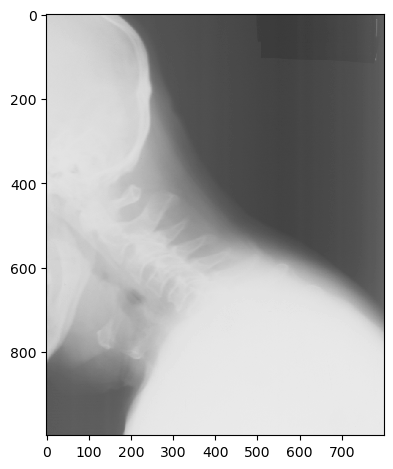

In [11]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

img_dir = './data/'
img_name = 'vertebra.png'
img = io.imread(img_dir + img_name)
#Load image using io
io.imshow(img)

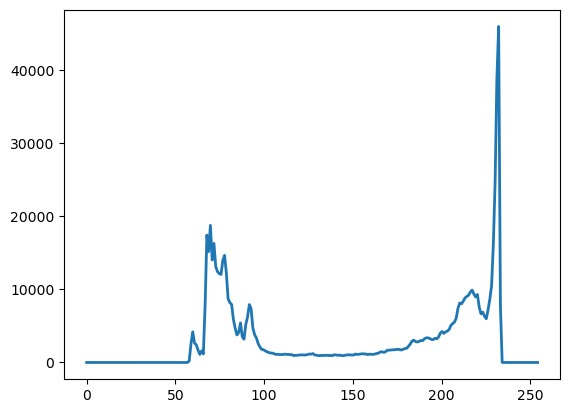

In [12]:
#Plot a histogram using matplotlib of the image by transforming the image to a 1D np array
hist = np.histogram(img, bins=256, range=(0, 255))
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.show()

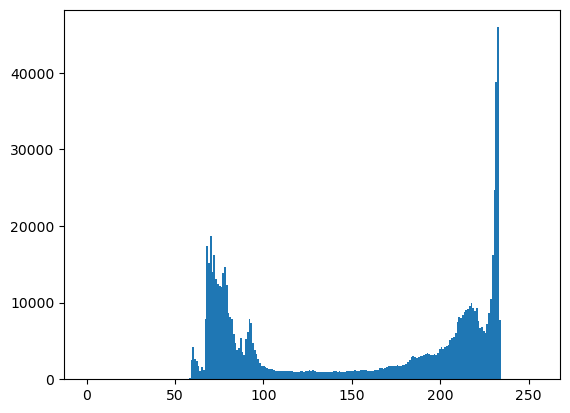

In [15]:
#Alternatively, using the built-in function of plt
#img.ravel transforms a 2D array into a 1D array (flattens it)
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.show()

Looking at the histogram, it appears as if we should be able to seperate the background and foreground as it looks bimodal.

## Exercise 2
Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [16]:
np.min(img), np.max(img)


(57, 235)

The image is not using the full range of values (0-255) hence we can do histogram strecthing to use the full range of values and increase the constrast of the image for better visibility.

## Exercise 3
Add an import statement to your script:
In unsigned byte images, the possible pixel value range is [0, 255]. When converting an unsigned byte image to a float image, the possible pixel value range will be [0, 1]. When you use Python skimage function img_as_float on an unsigned byte image, it will automatically divide all pixel values with 255.

In [18]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [17]:
type(img)

numpy.ndarray

Compute the minimum and maximum values of this float image. Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?

In [19]:
#Read the vertebral image as a float, and as an unsigned byte
img_float = img_as_float(img)
img_ubyte = img_as_ubyte(img)

#Show the min and max values of the images
print('Float image min and max values: ', np.min(img_float), np.max(img_float))
print('Unsigned byte image min and max values: ', np.min(img_ubyte), np.max(img_ubyte))

Float image min and max values:  0.22352941176470587 0.9215686274509803
Unsigned byte image min and max values:  57 235


In [23]:
#Verifying that the images values are simply converted, by multiplying the float image by 255 and rounding it to nearest integer
img_ubyte2 = np.round(img_float * 255).astype(np.uint8)
print('Unsigned byte image min and max values: ', np.min(img_ubyte2), np.max(img_ubyte2))

Unsigned byte image min and max values:  57 235


Verified as similar values

## Exercise 5, histogram stretching
You should implement a function, that automatically stretches the histogram of an image. In other words, the function should create a new image, where the pixel values are changed so the histogram of the output image is optimal. Here optimal means, that the minimum value is 0 and the maximum value is 255. It should be based on the linear histogram stretching equation:

In [24]:
def hist_stretch(img_in):
    #Convert image to float
    img_in = img_as_float(img_in)
    #min and max values of the input image
    vmax = np.max(img_in)
    vmin = np.min(img_in)
    #Desired min and max values
    vmaxd = 1.0
    vmind = 0.0
    #Stretching the image
    img_out = (vmaxd - vmind) / (vmax - vmin) * (img_in - vmin) + vmind
    #Convert image back to unsigned byte
    return img_as_ubyte(img_out)

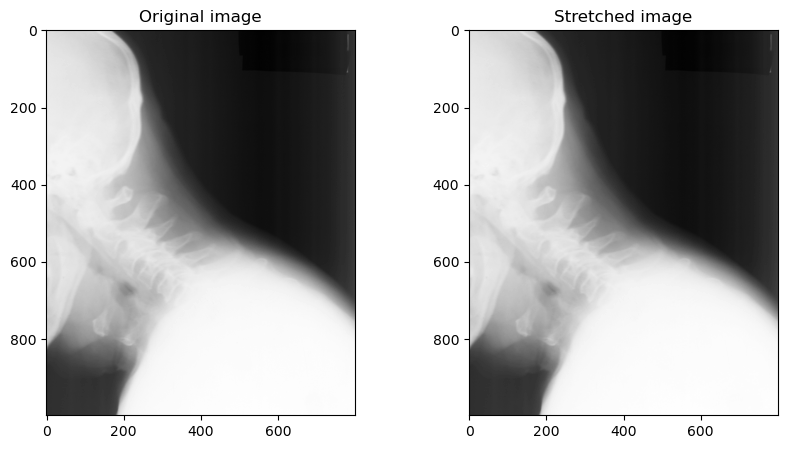

In [25]:
img_strecthed = hist_stretch(img)
#Show the original image img and the stretched image img_strecthed next to each other
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_strecthed, cmap='gray')
ax[1].set_title('Stretched image')
plt.show()


The changes are not significant visually speaking

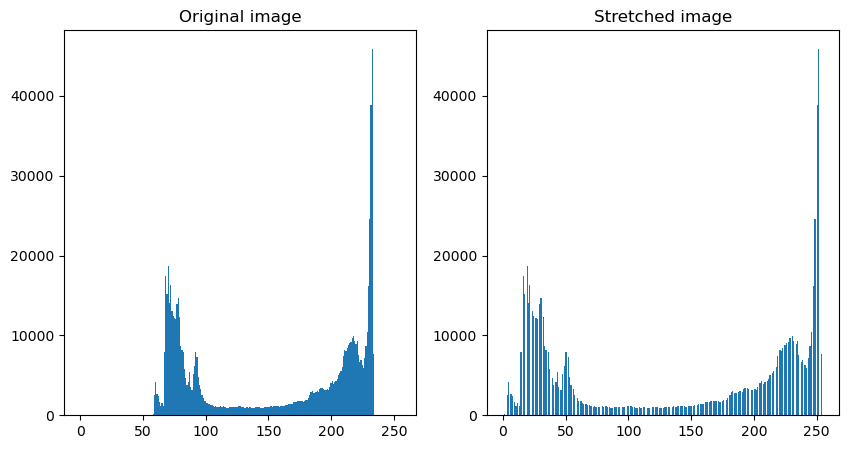

In [26]:
#Plot the histogram of the original image and the stretched image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img.ravel(), bins=256, range=(0, 255))
ax[0].set_title('Original image')
ax[1].hist(img_strecthed.ravel(), bins=256, range=(0, 255))
ax[1].set_title('Stretched image')
plt.show()


But the changes can be seen on the histogram

## Exercise 7 & 8: Non-linear pixel value mapping

Exercise 7: Implement a function, gamma_map(img, gamma), that:

* Converts the input image to float
* Do the gamma mapping on the pixel values
* Returns the resulting image as an unsigned byte image.

In [27]:
def gamma_map(img_in, gamma):
    #Convert input image to float
    img_float = img_as_float(img_in)
    #Apply gamma correction
    img_out = np.power(img_float, gamma)
    #Convert image back to unsigned byte
    return img_as_ubyte(img_out)

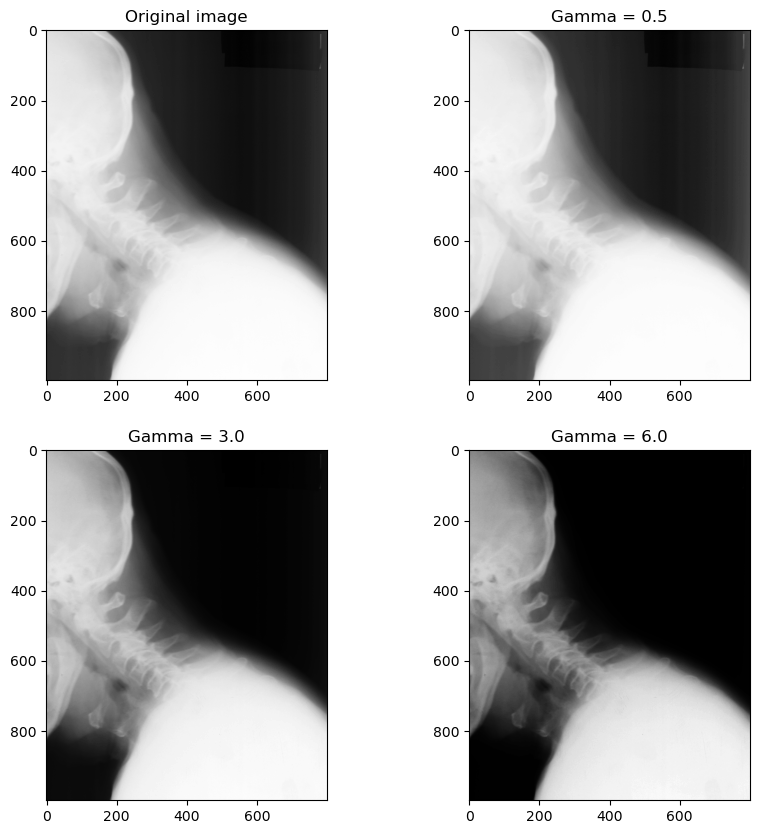

In [34]:
#Apply 3 different levels of gamma correction to the original image, 0.5, 3.0 and 6.0 and show the results
img_gamma1 = gamma_map(img, 0.5)
img_gamma2 = gamma_map(img, 3.0)
img_gamma3 = gamma_map(img, 6.0)

#Show the original image img and the gamma corrected image img_gamma next to each other
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(img_gamma1, cmap='gray')
ax[0, 1].set_title('Gamma = 0.5')
ax[1, 0].imshow(img_gamma2, cmap='gray')
ax[1, 0].set_title('Gamma = 3.0')
ax[1, 1].imshow(img_gamma3, cmap='gray')
ax[1, 1].set_title('Gamma = 6.0')
plt.show()


## Exercise 9 & 10: Image segmentation by thresholding

In [36]:
def threshold_image(img_in, thres):
    """
    Function to seperate foreground and background pixels in an image based on a threshold value
    :param img_in: Input image (unsigned byte)
    :param thres: Threshold value in range of 0 to 255
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_byte = img_as_ubyte(img_in)
    img_out = np.zeros(img_byte.shape, dtype=np.uint8)
    img_out[img_byte > thres] = 255
    return img_out

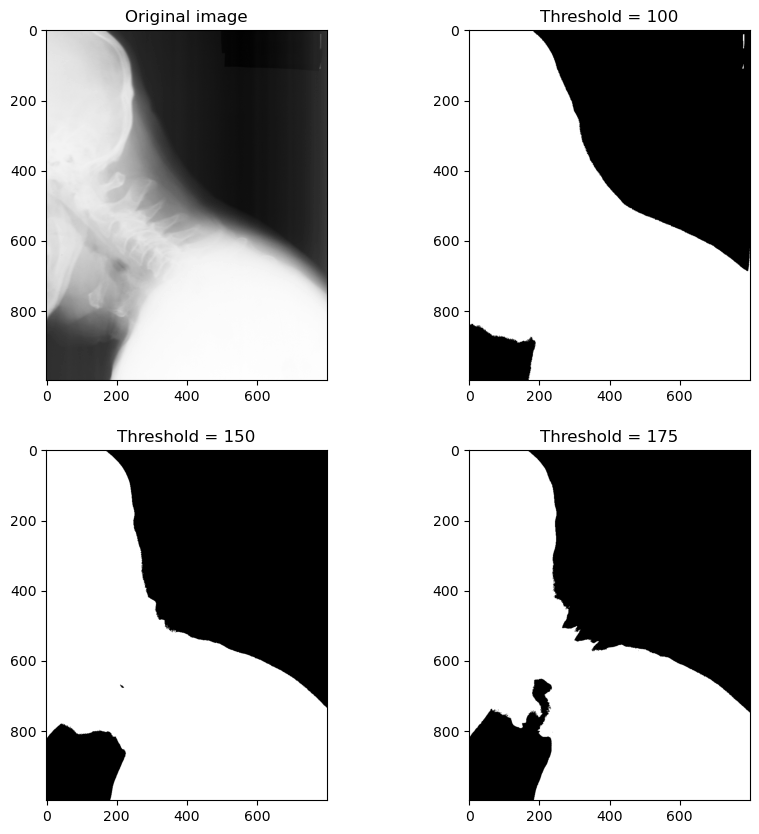

In [41]:
#Apply 3 different levels of thresholds to the original image, 50, 100 and 150 and show the results
img_thres1 = threshold_image(img, 100)
img_thres2 = threshold_image(img, 150)
img_thres3 = threshold_image(img, 175)

#Show the original image img and the gamma corrected image img_gamma next to each other
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(img_thres1, cmap='gray')
ax[0, 1].set_title('Threshold = 100')
ax[1, 0].imshow(img_thres2, cmap='gray')
ax[1, 0].set_title('Threshold = 150')
ax[1, 1].imshow(img_thres3, cmap='gray')
ax[1, 1].set_title('Threshold = 175')
plt.show()


## Exercise 11 & 12: Otsus Method

In [46]:
from skimage.filters import threshold_otsu

def otsu_threshold(img_in):
    """
    Function to seperate foreground and background pixels in an image based on Otsu's method
    :param img_in: Input image (unsigned byte)
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_byte = img_as_ubyte(img_in)
    thres = threshold_otsu(img_byte)
    print('Otsu threshold value: ', thres)
    img_out = np.zeros(img_byte.shape, dtype=np.uint8)
    img_out[img_byte > thres] = 255
    return img_out

Otsu threshold value:  148


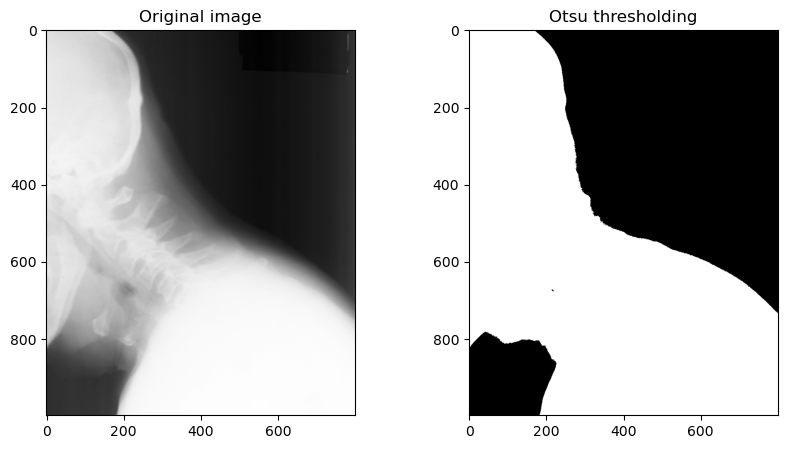

In [47]:
#Apply Otsu's thresholding to the original image and show the result
img_otsu = otsu_threshold(img)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_otsu, cmap='gray')
ax[1].set_title('Otsu thresholding')
plt.show()


How does the threshold and the result compare to your manually found threshold?

Otsus Threshold looks better than what I could come up with!

Exercicse 12: Use your camera to take some pictures of yourself or a friend. Try to take a picture on a dark background. Convert the image to grayscale and try to find a threshold that creates a silhouette image (an image where the head is all white and the background black).


Otsu threshold value:  58


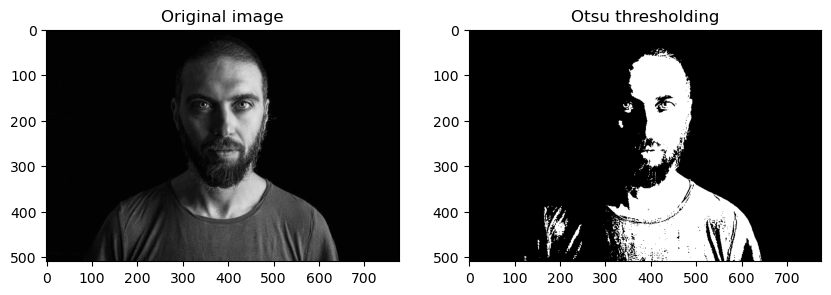

In [50]:
img_name = 'dark_background.png'
img2 = io.imread(img_dir+img_name, as_gray=True)
#Apply Otsu's thresholding to the original image and show the result
img_otsu2 = otsu_threshold(img2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_otsu2, cmap='gray')
ax[1].set_title('Otsu thresholding')
plt.show()

Not that great, trying with manual threshold:


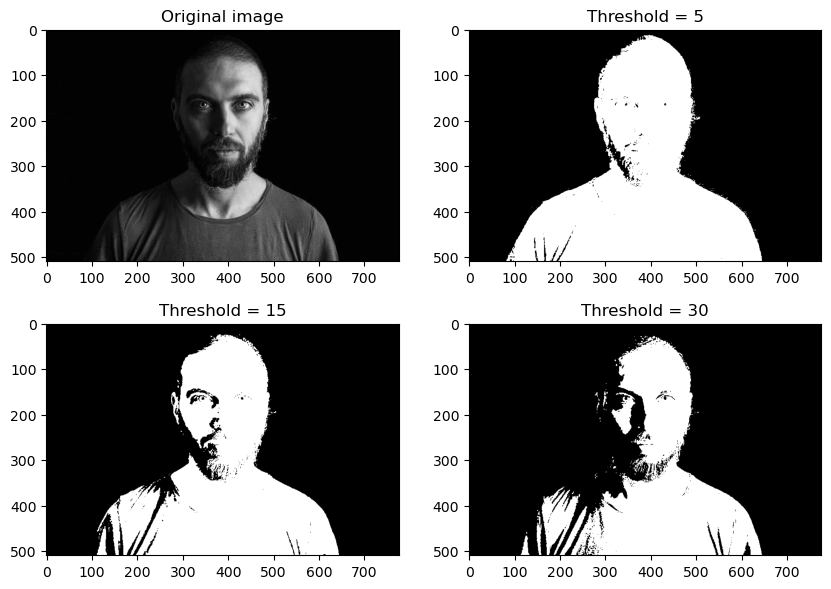

In [57]:
#Apply 3 different levels of thresholds to the original image, 50, 100 and 150 and show the results
img_thres1 = threshold_image(img2, 5)
img_thres2 = threshold_image(img2, 15)
img_thres3 = threshold_image(img2, 30)

#Show the original image img and the gamma corrected image img_gamma next to each other
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0, 0].imshow(img2, cmap='gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(img_thres1, cmap='gray')
ax[0, 1].set_title('Threshold = 5')
ax[1, 0].imshow(img_thres2, cmap='gray')
ax[1, 0].set_title('Threshold = 15')
ax[1, 1].imshow(img_thres3, cmap='gray')
ax[1, 1].set_title('Threshold = 30')
plt.show()  

### Exercise 13 & 14: Thresholding in RGB Space
In the following, we will make a simple system for road-sign detection. Start by reading the image DTUSigns2.jpg found in the exercise data. We want to make a system that do a segmentation of the image - meaning that a new binary image is created, where the foreground pixels correspond to the sign we want to detect.

We do that by tresholding the colour-channels individually. This code segments out the blue sign:

shape of image (3024, 4032, 3)
img object type <class 'numpy.ndarray'>
dtype of image uint8


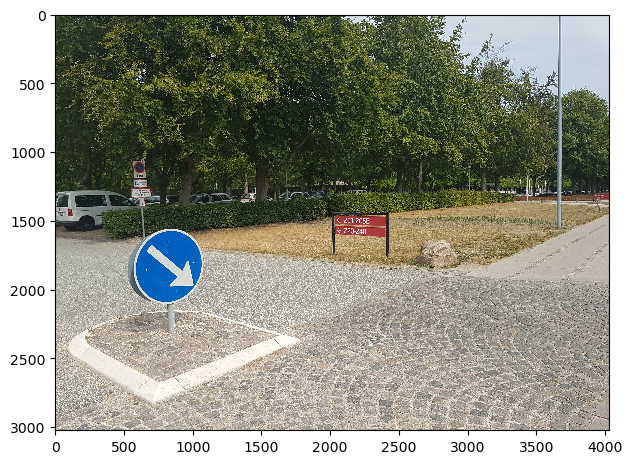

In [128]:
img_name = 'DTUSigns2.jpg'
img3 = io.imread(img_dir+img_name)
print('shape of image', img3.shape)
print('img object type', type(img3))
print('dtype of image', img3.dtype)
io.imshow(img3)

In [129]:
#downsize the image to 1/4 of the original size to make it easier to work with
from skimage import transform
#Rescale transforms the image to float64 by default, so we need to convert it back to uint8
img3_downscale = transform.rescale(img3, 0.25, anti_aliasing=True, channel_axis=2)
img3_downscale = img_as_ubyte(img3_downscale)


shape of image (756, 1008, 3)


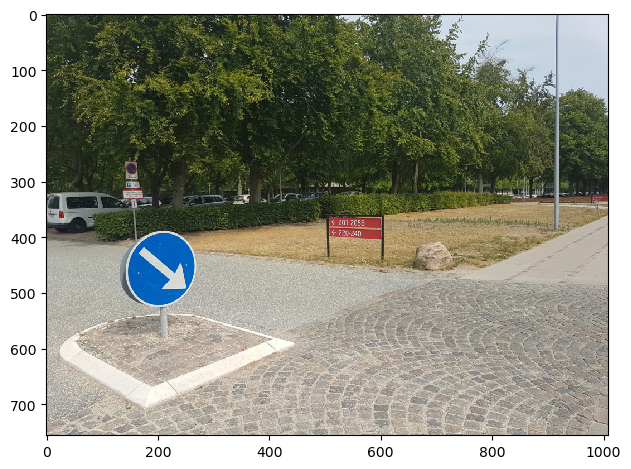

In [130]:
io.imshow(img3_downscale)
print('shape of image', img3_downscale.shape)

In [131]:
print('First pixel in image: ', img3_downscale[0, 0, :])

First pixel in image:  [51 64 42]


In [132]:
#Print the pixel value of the blue sign in the image
print('Blue sign pixel in image: ', img3[412, 212, :])

Blue sign pixel in image:  [25 32  0]


In [133]:
def detect_dtu_signs(im_org):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    #Create a binary filter for the detected blue pixels
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    #Return the binary image (true / false) where the blue pixels are detected
    return segm_blue

    #alternatively
    img_byte = img_as_ubyte(segm_blue)
    img_byte = np.where(segm_blue, 255, 0)
    #Transform segm_blue to binary image with 1 channel
    
    return img_byte

    

dim of segm_blue (756, 1008)
dtype of segm_blue bool
type of segm_blue <class 'numpy.ndarray'>


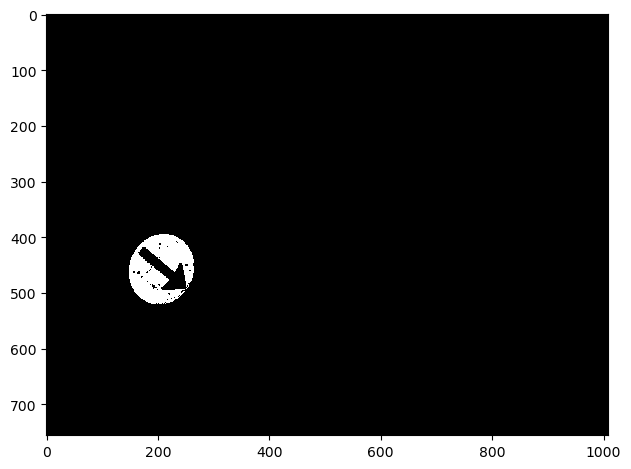

In [134]:
blue_signs = detect_dtu_signs(img3_downscale)
print('dim of segm_blue', blue_signs.shape)
print('dtype of segm_blue', blue_signs.dtype)
print('type of segm_blue', type(blue_signs))
io.imshow(blue_signs)

In [135]:
def detect_dtu_signs(im_org, color_list: list):
    """
    Function to detect the DTU signs in an image
    :param im_org: Input image (unsigned byte)
    :param color: Names of the colors to detect, e.g. ['blue', 'red']
    :return: Binary image (unsigned byte) where the detected sign is 255 and the rest is 0
    """
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    #Iterate through the list of colors to detect and create a binary filter for each color
    for color in color_list:
        if color == 'blue':
            segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                        (b_comp > 180) & (b_comp < 200)
        if color == 'red':
            segm_red = (r_comp > 165) & (r_comp < 180) & (g_comp > 50) & (g_comp < 70) & \
                       (b_comp < 70)
    #Combine the binary filters for the different colors
    segm_color = segm_blue | segm_red

    #Return the binary image (true / false) where the colored pixels are detected
    return segm_color

dim of segm_blue (756, 1008)
dtype of segm_blue bool
type of segm_blue <class 'numpy.ndarray'>


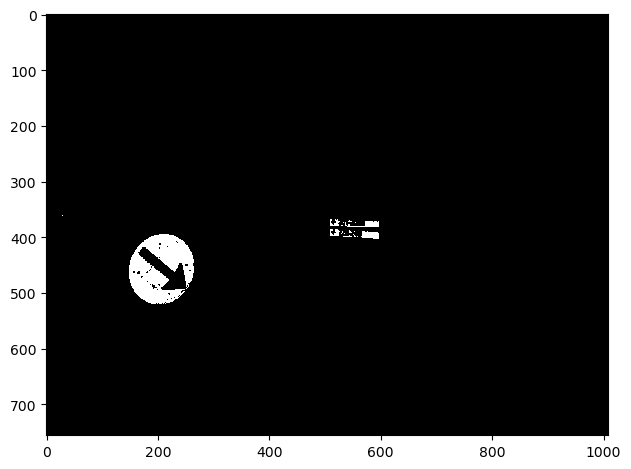

In [136]:
dtu_signs = detect_dtu_signs(img3_downscale, ['blue', 'red'])
print('dim of segm_blue', dtu_signs.shape)
print('dtype of segm_blue', dtu_signs.dtype)
print('type of segm_blue', type(dtu_signs))
io.imshow(dtu_signs)

### Exercise 15, Color Thresholding in the HSV COlor space

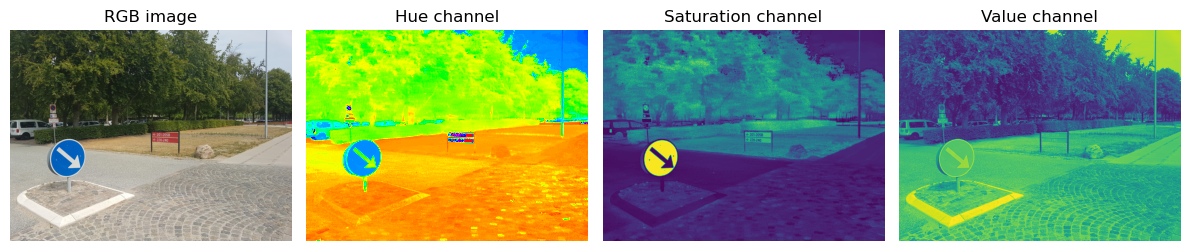

In [146]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color

hsv_img = color.rgb2hsv(img3_downscale)
hue_img = hsv_img[:, :, 0]
sat_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(12, 8))
ax0.imshow(img3_downscale)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(sat_img)
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()
io.show()

In [147]:
hsv_img.shape
hsv_img[0, 0, :]

array([0.26515152, 0.34375   , 0.25098039])

In [148]:
#Print the pixel value of the blue sign in the image
print('Blue sign pixel in image: ', hsv_img[412, 212, :])

Blue sign pixel in image:  [0.58602151 0.99465241 0.73333333]


In [149]:
#Convert the hsv_img to 0-255 range
hsv_img = img_as_ubyte(hsv_img)
print('Blue sign pixel in image: ', hsv_img[412, 212, :])

Blue sign pixel in image:  [149 254 187]


In [155]:
def detect_dtu_signs_HSV(im_org, color_list: list):
    """
    Function to detect the DTU signs in an image
    :param im_org: Input image (unsigned byte)
    :param color: Names of the colors to detect, e.g. ['blue', 'red']
    :return: Binary image (unsigned byte) where the detected sign is 255 and the rest is 0
    """
    hsv_img = color.rgb2hsv(im_org)
    hsv_img = img_as_ubyte(hsv_img)
    h_comp = hsv_img[:, :, 0]
    s_comp = hsv_img[:, :, 1]
    v_comp = hsv_img[:, :, 2]
    #Iterate through the list of colors to detect and create a binary filter for each color
    #The color inspector I found online provided Hue in 0-360 range (degree) and Saturation and Value in 0-100 range (percentage)
    for item in color_list:
        if item == 'blue':
            segm_blue = (h_comp > int(np.round(200/360*255))) & (h_comp < int(np.round(220/360*255))) & (s_comp > int(np.round(90.0/100*255))) &  \
                        (v_comp > int(np.round(65.0/100*255))) & (v_comp < int(np.round(85.0/100*255)))
        if item == 'red':
            segm_red = (h_comp > int(np.round(350/360*255))) & (s_comp > int(np.round(60.0/100*255))) & (s_comp < int(np.round(70.0/100*255))) &  \
                        (v_comp > int(np.round(60.0/100*255))) & (v_comp < int(np.round(70.0/100*255)))
    #Combine the binary filters for the different colors
    segm_color = segm_blue | segm_red

    #Return the binary image (true / false) where the colored pixels are detected
    return segm_color

dim of segm_blue (756, 1008)
dtype of segm_blue bool
type of segm_blue <class 'numpy.ndarray'>


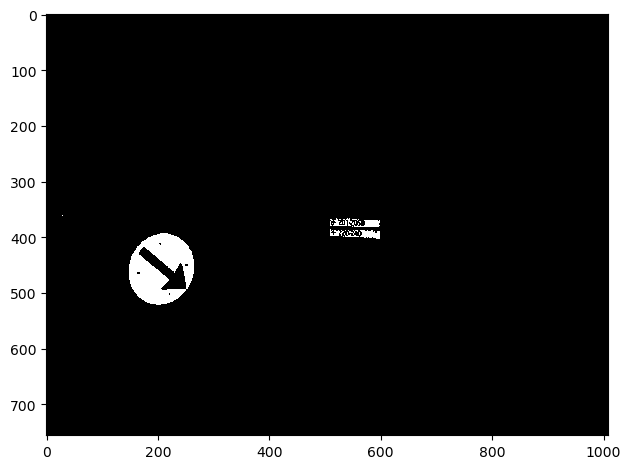

In [156]:
dtu_signs = detect_dtu_signs_HSV(img3_downscale, ['blue', 'red'])
print('dim of segm_blue', dtu_signs.shape)
print('dtype of segm_blue', dtu_signs.dtype)
print('type of segm_blue', type(dtu_signs))
io.imshow(dtu_signs)

### Exercise 16, 17 & 18
In the exercise material, there is a Python script using OpenCV that:

* Connects to a camera
* Acquire images, converts them to gray-scale
* Do a simple processing on the gray-scale (inversion) or the colour image (inversion of the red channel)
* Computes the frames per second (fps) and shows it on an image.
* Shows input and resulting images in windows.
* Checks if the key q has been pressed and stops the program if it is pressed.


Exercise 16: *Run the program from the exercise material and see if it shows the expected results? 

It runs as expected :-)


Exercise 17: Change the gray-scale processing in the exercise material script to be for example thresholding, gamma mapping or something else. Do you get the visual result that you expected?

Exercise 18: Real time detection of DTU signs